<a href="https://colab.research.google.com/github/NicoPatalagua/Scikit-learn/blob/master/Sci_Kit_Learn_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo G: Regresión Lineal - MultiVariable

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el "Target Value" 
sea una combinación lineal de las variables de entrada".




![](./img/dict.png)

## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [1]:
import numpy as np #Soporte para vectores y matrices
import pandas as pd #Manipulación y análisis de datos 
import seaborn as sns #Graficos elegantes 
import matplotlib.pyplot as plt #Diseño y realización de graficas
#incorporar las gráficas en este documento
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split #Dividir dataset en trenes aleatorios y subconjuntos de prueba
from sklearn.linear_model import LinearRegression #Regresión lineal de mínimos cuadrados ordinarios.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Error cuadratico medio, error absoluto medio y r2 score.

## 2.- Exporación y preparación del conjunto de datos 

In [184]:
#Exportamos el dataset
ObjData=pd.read_csv('cancerLung.csv')
#Presentar la cabecera del dataset
ObjData.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
0,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,0,0,0,0,243173,44638,50.9,122,stable,37.6,86,298695,8006.160130,81411.808032,14944.341218,0,0
1,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,0,0,0,0,13023,4482,49.2,5,rising,44.5,4,17946,24317.396634,72567.703109,24974.924774,1,0
2,7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068.0,0,0,0,0,80815,12279,51.8,37,stable,45.4,29,99631,7780.710823,81114.311811,12324.477321,0,0
3,9,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746.0,0,0,0,0,27321,4646,44.5,12,stable,41.6,10,32756,6441.567957,83407.619978,14183.661009,0,0
4,10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684.0,0,0,0,0,44059,11868,60.0,41,stable,43.3,28,58059,9573.020548,75886.598116,20441.275254,0,0


In [185]:
ObjState=ObjData['AreaName'].str.split(',',expand=True)
ObjState.rename(columns={0:'City',1:'state'},inplace=True)
ObjState.head()

,City,state
0,Anchorage Municipality,Alaska
1,Bethel Census Area,Alaska
2,Fairbanks North Star Borough,Alaska
3,Juneau City and Borough,Alaska
4,Kenai Peninsula Borough,Alaska


In [186]:
ObjData['AreaName']=ObjState['City']
ObjData['State']=ObjState['state']
ObjData.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
0,2,Alaska,Anchorage Municipality,23914,10698,13216,2020,78326.0,0,0,0,0,243173,44638,50.9,122,stable,37.6,86,298695,8006.160130,81411.808032,14944.341218,0,0
1,3,Alaska,Bethel Census Area,4364,2199,2165,2050,51012.0,0,0,0,0,13023,4482,49.2,5,rising,44.5,4,17946,24317.396634,72567.703109,24974.924774,1,0
2,7,Alaska,Fairbanks North Star Borough,7752,3523,4229,2090,71068.0,0,0,0,0,80815,12279,51.8,37,stable,45.4,29,99631,7780.710823,81114.311811,12324.477321,0,0
3,9,Alaska,Juneau City and Borough,2110,1145,965,2110,85746.0,0,0,0,0,27321,4646,44.5,12,stable,41.6,10,32756,6441.567957,83407.619978,14183.661009,0,0
4,10,Alaska,Kenai Peninsula Borough,5558,2596,2962,2122,63684.0,0,0,0,0,44059,11868,60.0,41,stable,43.3,28,58059,9573.020548,75886.598116,20441.275254,0,0


In [146]:
#Presentar la cantidad de filas y columnas:
ObjData.shape

(2788, 25)

In [147]:
#Limpiamos el dataset
ObjData.dropna()
ObjData.shape

(2788, 25)

In [148]:
print("Número de columnas: ",ObjData.shape[1])
print("Número de filas: ",ObjData.shape[0])

Número de columnas:  25
Número de filas:  2788


In [149]:
#Contamos valores por estado
ObjData['State'].value_counts()

 Texas                   189
 Georgia                 149
 Virginia                126
 Kentucky                119
 Missouri                114
 Illinois                102
 North Carolina           99
 Iowa                     97
 Tennessee                95
 Indiana                  91
 Ohio                     88
 Michigan                 82
 Minnesota                81
 Mississippi              80
 Arkansas                 75
 Wisconsin                71
 Oklahoma                 70
 Kansas                   69
 Florida                  67
 Alabama                  67
 Pennsylvania             67
 Louisiana                63
 New York                 62
 West Virginia            55
 California               55
 Nebraska                 54
 South Carolina           46
 Colorado                 39
 Washington               37
 Montana                  36
 Oregon                   33
 Idaho                    32
 South Dakota             32
 New Mexico               26
 Maryland     

In [150]:
#Exploramos un poco los datos
print("Información del dataset:\n")
ObjData.info()

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2788 non-null   int64  
 1   State              2788 non-null   object 
 2   AreaName           2788 non-null   object 
 3   All_Poverty        2788 non-null   int64  
 4   M_Poverty          2788 non-null   int64  
 5   F_Poverty          2788 non-null   int64  
 6   FIPS               2788 non-null   int64  
 7   Med_Income         2788 non-null   float64
 8   M_With             2788 non-null   int64  
 9   M_Without          2788 non-null   int64  
 10  F_With             2788 non-null   int64  
 11  F_Without          2788 non-null   int64  
 12  All_With           2788 non-null   int64  
 13  All_Without        2788 non-null   int64  
 14  Incidence_Rate     2788 non-null   float64
 15  Avg_Ann_Incidence  2788 non-null   object 
 16

In [187]:
#Usamos 'Mortality_Rate (Tasa de mortalidad) como variable tarjet
ObjData.rename(columns={'Mortality_Rate':'target'},inplace=True)
ObjData.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,target,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
0,2,Alaska,Anchorage Municipality,23914,10698,13216,2020,78326.0,0,0,0,0,243173,44638,50.9,122,stable,37.6,86,298695,8006.160130,81411.808032,14944.341218,0,0
1,3,Alaska,Bethel Census Area,4364,2199,2165,2050,51012.0,0,0,0,0,13023,4482,49.2,5,rising,44.5,4,17946,24317.396634,72567.703109,24974.924774,1,0
2,7,Alaska,Fairbanks North Star Borough,7752,3523,4229,2090,71068.0,0,0,0,0,80815,12279,51.8,37,stable,45.4,29,99631,7780.710823,81114.311811,12324.477321,0,0
3,9,Alaska,Juneau City and Borough,2110,1145,965,2110,85746.0,0,0,0,0,27321,4646,44.5,12,stable,41.6,10,32756,6441.567957,83407.619978,14183.661009,0,0
4,10,Alaska,Kenai Peninsula Borough,5558,2596,2962,2122,63684.0,0,0,0,0,44059,11868,60.0,41,stable,43.3,28,58059,9573.020548,75886.598116,20441.275254,0,0


## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)
- Dispersión par por variables
- Gráfica de Distribución (Baja distribución "no ayuda a la predición de $Target$")
- Gráfica de Matriz de Correlación (relación con la variable $Target$)

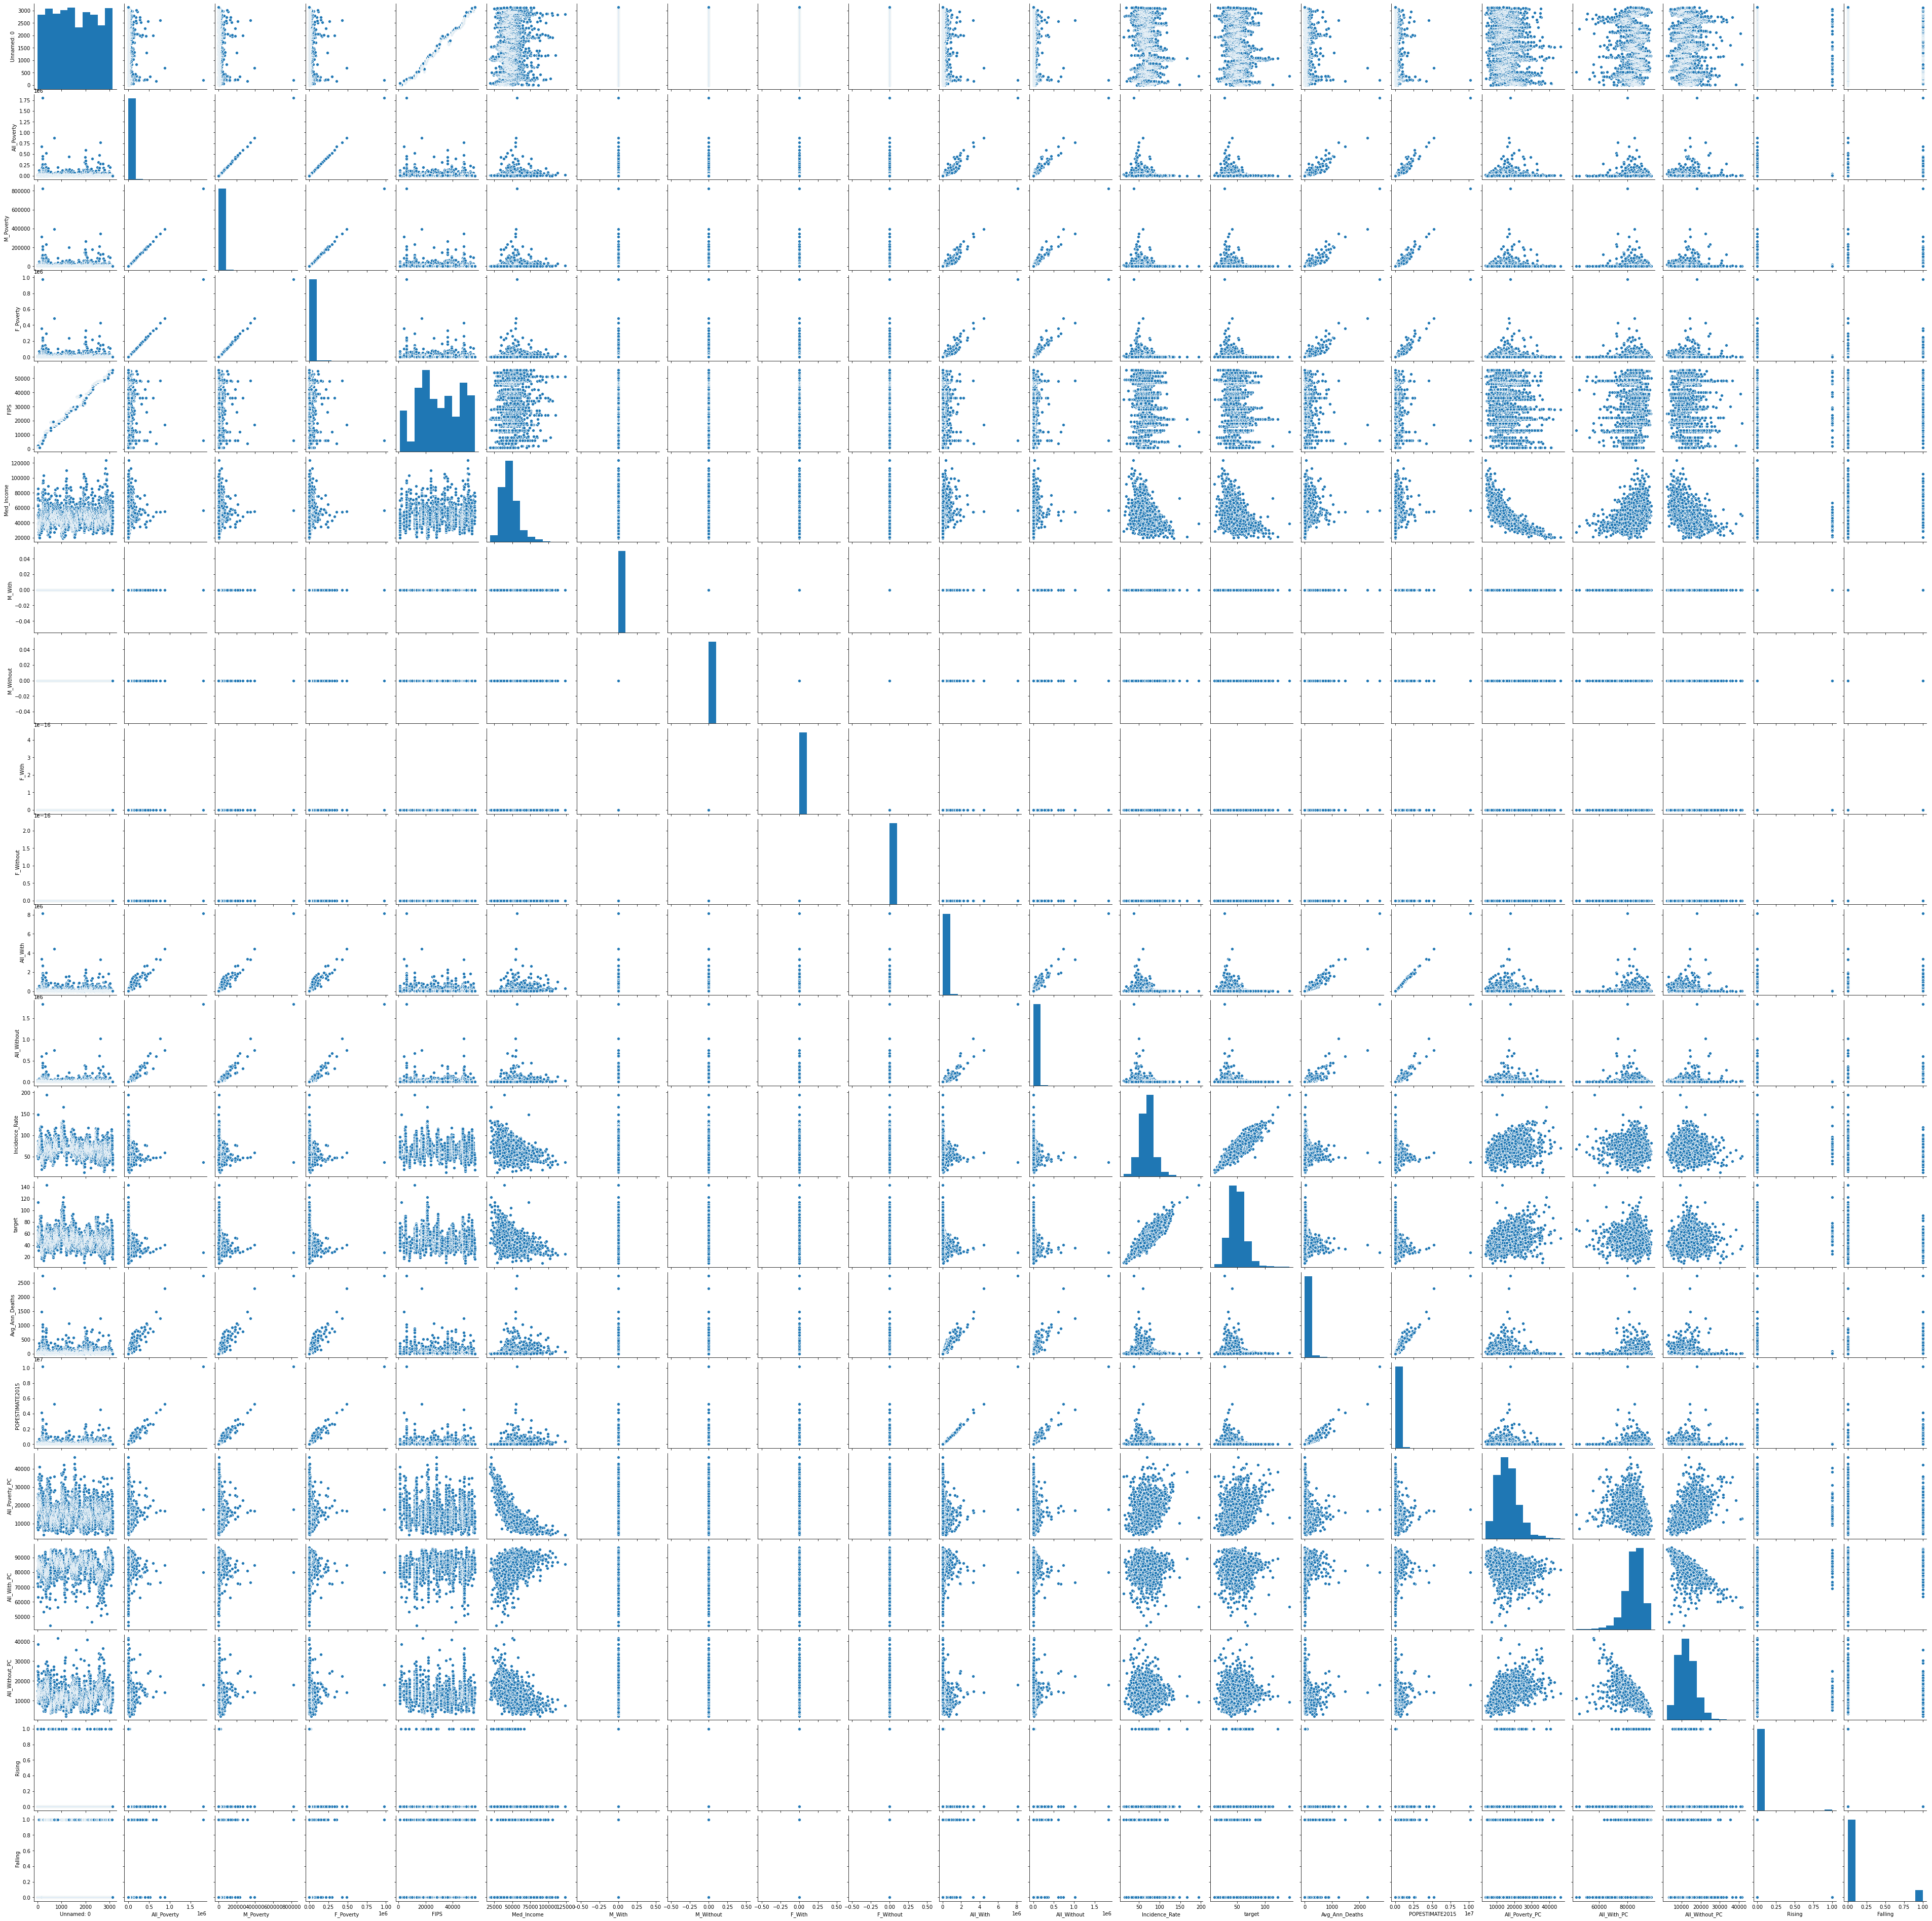

In [152]:
#Dispersion par por variables
sns.pairplot(ObjData)

Grafico de distribución


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


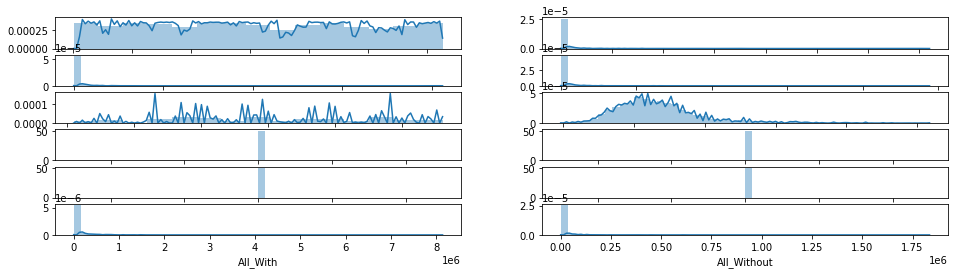

In [193]:
print("Grafico de distribución")
ObjFilas = 6
ObjColumnas = 2
fig, ax = plt.subplots(nrows=ObjFilas, ncols=ObjColumnas, figsize=(16,4))
columna = ObjData1.columns
index = 0
for i in range(ObjFilas):
    for j in range(ObjColumnas):
        sns.distplot(ObjData1[columna[index]], ax = ax[i][j], kde_kws={'bw':0.1})
        index = index + 1
plt.tight_layout()

In [194]:
#Matriz de Correlación
matrixCorrelacion =ObjData.corr()
matrixCorrelacion

,Unnamed: 0,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,target,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_PC,All_With_PC,All_Without_PC,Rising,Falling
Unnamed: 0,1.000000,-0.052592,-0.053861,-0.051516,0.991545,0.085543,NaN,NaN,NaN,NaN,-0.049206,-0.044364,-0.112582,-0.095428,-0.055594,-0.048913,-0.126696,0.002012,-0.016215,-0.026992,-0.104899
All_Poverty,-0.052592,1.000000,0.999694,0.999791,-0.057213,0.129091,NaN,NaN,NaN,NaN,0.959269,0.965665,-0.154401,-0.164123,0.910669,0.968297,0.021456,-0.044311,0.049019,-0.025262,0.253568
M_Poverty,-0.053861,0.999694,1.000000,0.998979,-0.058565,0.127630,NaN,NaN,NaN,NaN,0.958847,0.966673,-0.155398,-0.164625,0.908364,0.968176,0.022302,-0.044981,0.049959,-0.025128,0.252923
F_Poverty,-0.051516,0.999791,0.998979,1.000000,-0.056066,0.130240,NaN,NaN,NaN,NaN,0.959175,0.964384,-0.153505,-0.163631,0.912156,0.967950,0.020747,-0.043736,0.048218,-0.025361,0.253984
FIPS,0.991545,-0.057213,-0.058565,-0.056066,1.000000,0.083700,NaN,NaN,NaN,NaN,-0.054801,-0.048298,-0.104908,-0.094780,-0.058933,-0.054198,-0.137101,0.003392,-0.024690,-0.023750,-0.114035
Med_Income,0.085543,0.129091,0.127630,0.130240,0.083700,1.000000,NaN,NaN,NaN,NaN,0.273748,0.146286,-0.389305,-0.465298,0.240963,0.256312,-0.786348,0.315224,-0.455465,-0.043651,0.194551
M_With,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M_Without,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_With,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_Without,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


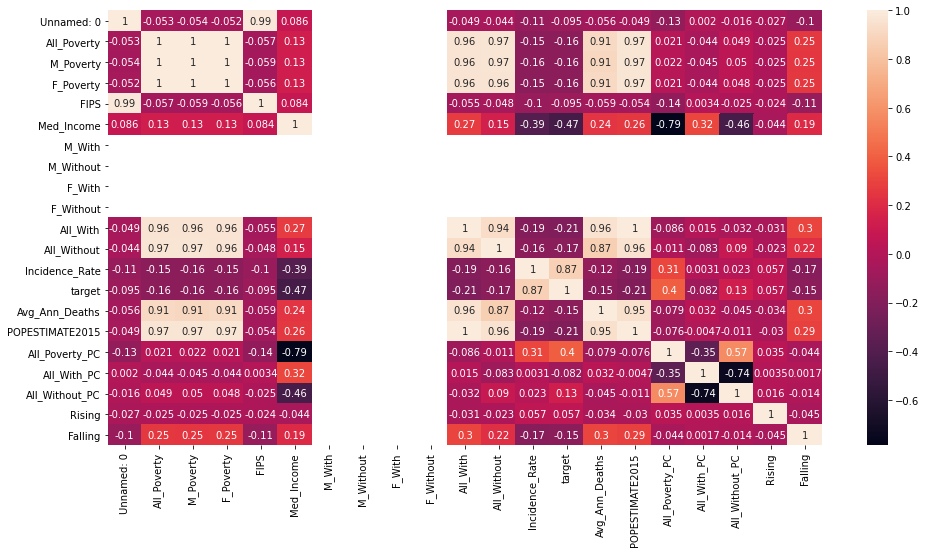

In [195]:
#Realizamos el mapa de calor
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(matrixCorrelacion, annot=True)

- Función para seleccionar $features$ con relación a la variable $target$. De esta forma se evita la MULTICOLLINEARITY

In [0]:
def relacionFeatures(correlacionData, umbral):
    feature = []
    valor = []
    for i, index in enumerate(correlacionData.index):
        if abs(correlacionData[index]) > umbral:
            feature.append(index)
            valor.append(correlacionData[index])    
    df  = pd.DataFrame(data = valor, index = feature, columns=['Valor Correlación'])
    return df

In [197]:
# umbral > 0.45
umbral = 0.45
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
valorCorrelacion

,Valor Correlación
Med_Income,-0.465298
Incidence_Rate,0.869428
target,1.000000


In [198]:
#Representamos los datos de correlación correctos 
dataCorrAceptada = ObjData[valorCorrelacion.index]
dataCorrAceptada.head()

,Med_Income,Incidence_Rate,target
0,78326.0,50.9,37.6
1,51012.0,49.2,44.5
2,71068.0,51.8,45.4
3,85746.0,44.5,41.6
4,63684.0,60.0,43.3


## 4.- A continuación se ajustará el modelo de regresión lineal y predecir.
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF.drop['target'] (o variables independientes)
### Y = dataF['target']

### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Selección de Variables Dep e Ind.
- División Valores en bloques de Entrenamiento y Prueba
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

In [0]:
#Seleccionamos las variables dependiente e independiente
X = dataCorrAceptada.drop('target', axis = 1)
y = dataCorrAceptada['target']

In [0]:
#Division de valores en bloques de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Seleccionamos el modelo lineal
modelo=LinearRegression()

## 5.- Entrenamiento del Modelo

In [202]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = modelo.predict(X_test)

In [204]:
# Impresión de intercepción, coeficientes y numero de coeficientes
print('Coeficiente: ',modelo.coef_)
print('Tamaño coeficiente: ',len(modelo.coef_))
print('Intercepción: ',modelo.intercept_)

Coeficiente:  [-1.64161523e-04  6.50781658e-01]
Tamaño coeficiente:  2
Intercepción:  12.918162549212624


In [205]:
d = {'Predicted': y_predict, 'target': y_test}
df = pd.DataFrame(data=d)
decimals = 1
df['Predicted'] = df['Predicted'].apply(lambda x: round(x, decimals))
df.head(10)

,Predicted,target
1857,43.5,46.6
2256,66.1,67.6
2631,49.2,46.1
687,73.5,69.6
1191,47.5,30.8
227,32.1,28.2
1147,50.2,52.9
829,50.7,54.5
320,52.9,55.2
1760,47.9,48.1


## 6.- Métricas y Evaluación del Modelo

Se calcula 
   - mse  (<a href="https://support.numxl.com/hc/es/articles/115001223423-MSE-Error-Cuadrático-Medio">Error Cuadrático Medio </a>).             
   - mae  (<a href="https://support.numxl.com/hc/es/articles/215969423-MAE-Error-medio-absoluto">Error Medio Absoluto</a>). 
   - score (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"/> r2_score</a>).


- mae : Fácil de entender, dado que es el error promedio.
- mse : Es más popular que $mae$, dado que $mse$ castiga grandes errores, útil en el mundo real.
- score: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">r2_score</a> Es incluso más popular que $mse$, dado que $rmse$ es interpretable en las unidades $"y"$
   - Esta no es una función simétrica. A diferencia de la mayoría de las otras puntuaciones, 
   la puntuación R^2 puede ser negativa (no tiene por qué ser el cuadrado de una cantidad R).
   - Esta métrica no está bien definida para muestras individuales y devolverá un valor de NaN 
     si n_muestras es menor que dos. 

In [206]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('r2_score: ', score)
print('MAE: ', mae)
print('MSE: ', mse)

r2_score:  0.813536138873665
MAE:  4.597401282022444
MSE:  39.83485181700905


In [0]:
#Función para almacenar las métricas de rendimiento
total_features = []
valor_correlacion = []
r2_valores = []
mse_valores = []
mae_valores = []

In [0]:
def metricas_evaluacion(features, umb, y_true, y_pred):
    puntuacion = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    total_features.append(len(features.columns)-1)
    valor_correlacion.append(umb)
    r2_valores.append(puntuacion)
    mse_valores.append(mse)
    mae_valores.append(mae)
    dfMetricas = pd.DataFrame(data=[total_features,valor_correlacion,r2_valores,mse_valores,mae_valores],
                             index=['#features','Umbral','R2','MSE','MAE'])
    return dfMetricas.T

In [209]:
#Evaluación del modelo según metricas
metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict)

,#features,Umbral,R2,MSE,MAE
0,2.0,0.45,0.813536,39.834852,4.597401


## 7.- Pruebas con diferentes umbrales de correlación

In [0]:
#Entrenamiento automatico dado el "dataCorrAceptada" por su umbral
def obtener_y_predict(data_Correlacionado):
    X = dataCorrAceptada.drop('target', axis = 1)
    y = dataCorrAceptada['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)  
    return y_predict

In [211]:
#Probamos el score con un umbral de >0.1
umbral = 0.1
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                 Valor Correlación
All_Poverty              -0.164123
M_Poverty                -0.164625
F_Poverty                -0.163631
Med_Income               -0.465298
All_With                 -0.208807
All_Without              -0.167928
Incidence_Rate            0.869428
target                    1.000000
Avg_Ann_Deaths           -0.152222
POPESTIMATE2015          -0.205195
All_Poverty_PC            0.398964
All_Without_PC            0.133554
Falling                  -0.151374 

      All_Poverty  M_Poverty  ...  All_Without_PC  Falling
2783         2381       1210  ...    10576.826952        0
2784         5058       2177  ...    13447.317707        0
2785         1638       1026  ...    16216.216216        0
2786         2845       1453  ...    14004.418404        0
2787         1137        489  ...    16738.712776        0

[5 rows x 13 columns] 

   #features  Umbral        R2        MSE       MAE
0        2.0    0.45  0.813536  39.834852  4.597401
1       12.0    0.10  0.8

In [212]:
#Probamos el score con un umbral de >0.2
umbral = 0.2
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                 Valor Correlación
Med_Income               -0.465298
All_With                 -0.208807
Incidence_Rate            0.869428
target                    1.000000
POPESTIMATE2015          -0.205195
All_Poverty_PC            0.398964 

      Med_Income  All_With  ...  POPESTIMATE2015  All_Poverty_PC
2783     55455.0     26099  ...            30009     7934.286381
2784     69022.0     38491  ...            44626    11334.199794
2785     75325.0     18503  ...            23125     7083.243243
2786     56569.0     17843  ...            20822    13663.432908
2787     47652.0      6839  ...             8328    13652.737752

[5 rows x 6 columns] 

   #features  Umbral        R2        MSE       MAE
0        2.0    0.45  0.813536  39.834852  4.597401
1       12.0    0.10  0.816673  39.164714  4.567346
2        5.0    0.20  0.815917  39.326241  4.587251 



In [213]:
#Probamos el score con un umbral de >0.3
umbral = 0.3
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                Valor Correlación
Med_Income              -0.465298
Incidence_Rate           0.869428
target                   1.000000
All_Poverty_PC           0.398964 

      Med_Income  Incidence_Rate  target  All_Poverty_PC
2783     55455.0            43.0    34.3     7934.286381
2784     69022.0            47.5    37.2    11334.199794
2785     75325.0            19.0    15.9     7083.243243
2786     56569.0            32.8    32.0    13663.432908
2787     47652.0            42.2    34.0    13652.737752 

   #features  Umbral        R2        MSE       MAE
0        2.0    0.45  0.813536  39.834852  4.597401
1       12.0    0.10  0.816673  39.164714  4.567346
2        5.0    0.20  0.815917  39.326241  4.587251
3        3.0    0.30  0.814048  39.725435  4.620430 



In [214]:
#Probamos el score con un umbral de >0.4
umbral = 0.4
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                Valor Correlación
Med_Income              -0.465298
Incidence_Rate           0.869428
target                   1.000000 

      Med_Income  Incidence_Rate  target
2783     55455.0            43.0    34.3
2784     69022.0            47.5    37.2
2785     75325.0            19.0    15.9
2786     56569.0            32.8    32.0
2787     47652.0            42.2    34.0 

   #features  Umbral        R2        MSE       MAE
0        2.0    0.45  0.813536  39.834852  4.597401
1       12.0    0.10  0.816673  39.164714  4.567346
2        5.0    0.20  0.815917  39.326241  4.587251
3        3.0    0.30  0.814048  39.725435  4.620430
4        2.0    0.40  0.813536  39.834852  4.597401 



In [215]:
#Probamos el score con un umbral de >0.5
umbral = 0.5
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                Valor Correlación
Incidence_Rate           0.869428
target                   1.000000 

      Incidence_Rate  target
2783            43.0    34.3
2784            47.5    37.2
2785            19.0    15.9
2786            32.8    32.0
2787            42.2    34.0 

   #features  Umbral        R2        MSE       MAE
0        2.0    0.45  0.813536  39.834852  4.597401
1       12.0    0.10  0.816673  39.164714  4.567346
2        5.0    0.20  0.815917  39.326241  4.587251
3        3.0    0.30  0.814048  39.725435  4.620430
4        2.0    0.40  0.813536  39.834852  4.597401
5        1.0    0.50  0.796620  43.448756  4.863975 



In [218]:
#Probamos el score con un umbral de >0.8
umbral = 0.8
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                Valor Correlación
Incidence_Rate           0.869428
target                   1.000000 

      Incidence_Rate  target
2783            43.0    34.3
2784            47.5    37.2
2785            19.0    15.9
2786            32.8    32.0
2787            42.2    34.0 

   #features  Umbral        R2        MSE       MAE
0        2.0    0.45  0.813536  39.834852  4.597401
1       12.0    0.10  0.816673  39.164714  4.567346
2        5.0    0.20  0.815917  39.326241  4.587251
3        3.0    0.30  0.814048  39.725435  4.620430
4        2.0    0.40  0.813536  39.834852  4.597401
5        1.0    0.50  0.796620  43.448756  4.863975
6        1.0    0.60  0.796620  43.448756  4.863975
7        1.0    0.70  0.796620  43.448756  4.863975
8        1.0    0.80  0.796620  43.448756  4.863975 

